🌾 Gambia Cereal Yield Prediction Model

📊 Loading data...
Dataset: 62 years of data (1961-2022)
Average yield: 1043 kg/hectare
Yield range: 461 - 1434 kg/hectare

📈 Creating visualizations...


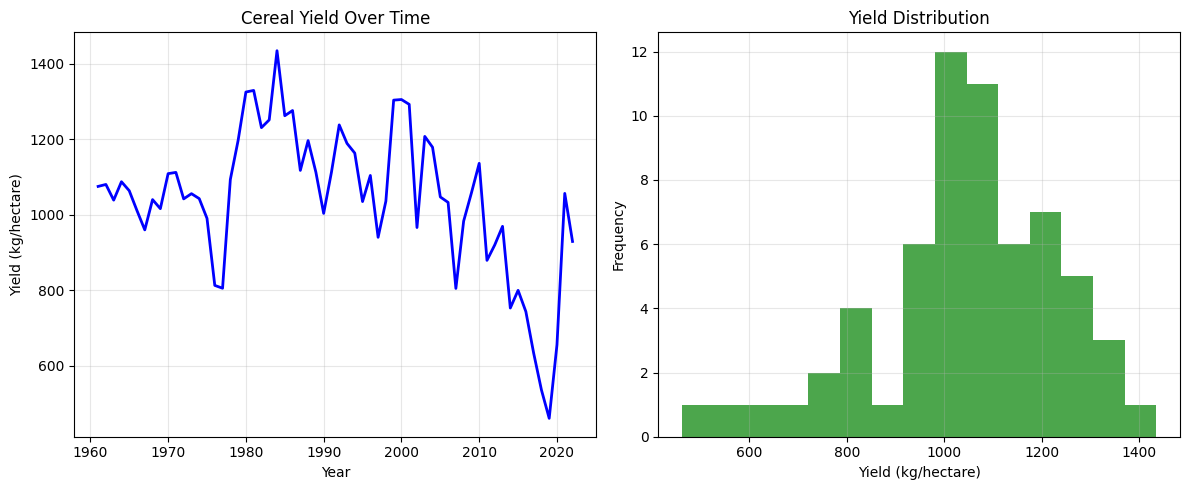


🔧 Preparing features...
Features used: 5
Sample size: 62 observations

✂️ Splitting data...
Training: 49 samples (1961-2009)
Testing: 13 samples (2010-2022)

🤖 Training models...
Linear Regression: R² = 0.660, RMSE = 112.4
Random Forest: R² = -0.731, RMSE = 253.5

🏆 Model selection...
Best model: Linear Regression
Performance: 0.660 R² (66.0% accuracy)
Average error: ±112 kg/hectare

📊 Creating final visualizations...


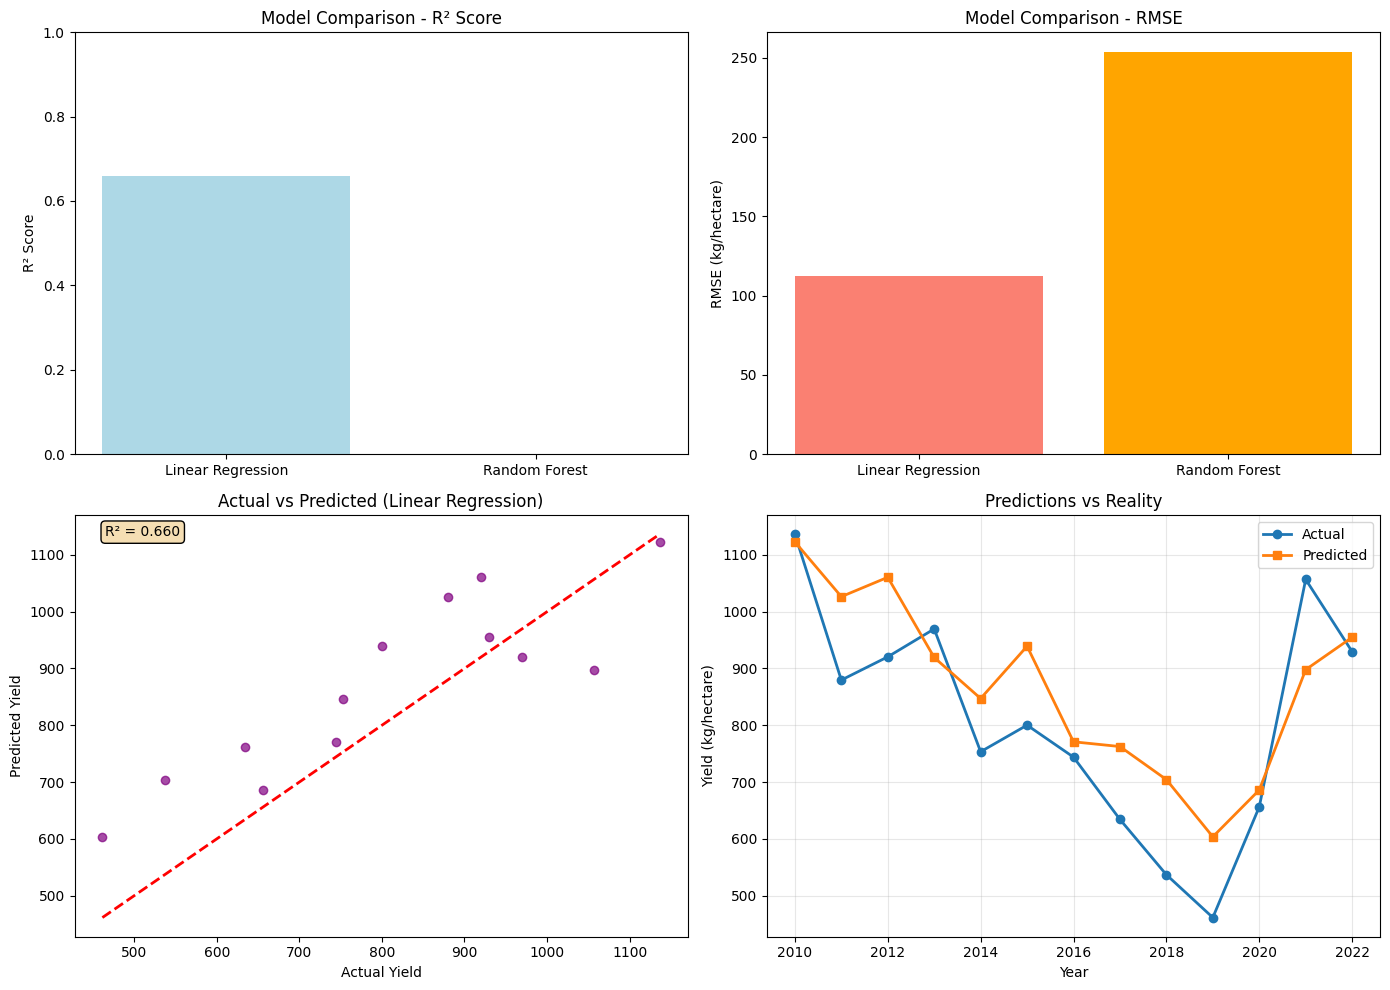


📋 SUMMARY & BUSINESS INSIGHTS

🎯 MODEL PERFORMANCE:
• Best model: Linear Regression
• Accuracy: 66.0% of yield variation explained
• Typical error: ±112 kg/hectare

📈 KEY FINDINGS:
• Average yield: 1043 kg/hectare
• Yield has been declining since 2014
• Strong recovery seen in 2021 (to 1057 kg/ha)
• Historical trends are good predictors of future yields

💡 RECOMMENDATIONS:
• Monitor yields closely - early warning system possible
• Plan for variability of ±112 kg/hectare
• Investigate causes of 2014-2019 decline
• Build on 2021 recovery strategies

⚠️  MODEL LIMITATIONS:
• Works best for short-term predictions (1-2 years)
• Cannot predict extreme weather events
• Needs regular updates with new data

🔮 PREDICTION FOR 2023:
   Estimated yield: 955 kg/hectare
   Confidence range: 843 - 1067 kg/hectare

✅ Analysis complete! Model ready for use.


In [ ]:
# Gambia Cereal Yield Forecasting Model
# Module 4 Assignment: Business Analytics Model
# By Ousman Kassama
# Date: 15th June 2025

# Install packages below
import subprocess
import sys

packages = ['scikit-learn', 'pandas', 'numpy', 'matplotlib', 'seaborn']
for package in packages:
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package], 
                            stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
    except:
        pass

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
print("🌾 Gambia Cereal Yield Prediction Model")
print("=" * 45)

# ===== STEP 1: Load and Explore Data =====
print("\n Loading data...")

# Load the dataset
df = pd.read_csv('gambia_cereal_yield_final_analysis.csv')
print(f"Dataset: {df.shape[0]} years of data ({df['Year'].min()}-{df['Year'].max()})")

# Quick look at the data
print(f"Average yield: {df['Cereal_Yield_kg_per_hectare'].mean():.0f} kg/hectare")
print(f"Yield range: {df['Cereal_Yield_kg_per_hectare'].min():.0f} - {df['Cereal_Yield_kg_per_hectare'].max():.0f} kg/hectare")

# ===== STEP 2: Visualize the Data =====
print("\n Creating visualizations...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Time series plot
ax1.plot(df['Year'], df['Cereal_Yield_kg_per_hectare'], 'b-', linewidth=2)
ax1.set_title('Cereal Yield Over Time')
ax1.set_xlabel('Year')
ax1.set_ylabel('Yield (kg/hectare)')
ax1.grid(True, alpha=0.3)

# Distribution
ax2.hist(df['Cereal_Yield_kg_per_hectare'], bins=15, alpha=0.7, color='green')
ax2.set_title('Yield Distribution')
ax2.set_xlabel('Yield (kg/hectare)')
ax2.set_ylabel('Frequency')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ===== STEP 3: Prepare Features =====
print("\n Preparing features...")

# Create simple but effective features
df_model = df.copy()

# Time features
df_model['years_since_start'] = df_model['Year'] - df_model['Year'].min()
df_model['decade'] = (df_model['Year'] // 10) * 10

# Trend features (moving averages)
df_model['yield_3yr_avg'] = df_model['Cereal_Yield_kg_per_hectare'].rolling(3, min_periods=1).mean()
df_model['yield_5yr_avg'] = df_model['Cereal_Yield_kg_per_hectare'].rolling(5, min_periods=1).mean()

# Previous year yield (lag feature)
df_model['prev_year_yield'] = df_model['Cereal_Yield_kg_per_hectare'].shift(1)

# Handle missing values
df_model = df_model.fillna(method='bfill')

# Select features for modeling
features = ['Year', 'years_since_start', 'yield_3yr_avg', 'yield_5yr_avg', 'prev_year_yield']
X = df_model[features]
y = df_model['Cereal_Yield_kg_per_hectare']

print(f"Features used: {len(features)}")
print(f"Sample size: {len(X)} observations")

# ===== STEP 4: Split Data =====
print("\n Splitting data...")

# Use time-based split (80% training, 20% testing)
split_point = int(0.8 * len(X))
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

train_years = df_model['Year'][:split_point]
test_years = df_model['Year'][split_point:]

print(f"Training: {len(X_train)} samples ({train_years.min()}-{train_years.max()})")
print(f"Testing: {len(X_test)} samples ({test_years.min()}-{test_years.max()})")

# ===== STEP 5: Train Models =====
print("\n Training models...")

# Try two different approaches
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=50, random_state=42)
}

results = {}

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate performance
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    results[name] = {
        'model': model,
        'test_r2': test_r2,
        'test_rmse': test_rmse,
        'predictions': test_pred
    }
    
    print(f"{name}: R² = {test_r2:.3f}, RMSE = {test_rmse:.1f}")

# ===== STEP 6: Choose Best Model =====
print("\n Model selection...")

# Find best model based on R²
best_name = max(results.keys(), key=lambda x: results[x]['test_r2'])
best_model = results[best_name]

print(f"Best model: {best_name}")
print(f"Performance: {best_model['test_r2']:.3f} R² ({best_model['test_r2']*100:.1f}% accuracy)")
print(f"Average error: ±{best_model['test_rmse']:.0f} kg/hectare")

# ===== STEP 7: Visualize Results =====
print("\n Creating final visualizations...")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# Model comparison
model_names = list(results.keys())
r2_scores = [results[name]['test_r2'] for name in model_names]
rmse_scores = [results[name]['test_rmse'] for name in model_names]

ax1.bar(model_names, r2_scores, color=['lightblue', 'lightgreen'])
ax1.set_title('Model Comparison - R² Score')
ax1.set_ylabel('R² Score')
ax1.set_ylim(0, 1)

ax2.bar(model_names, rmse_scores, color=['salmon', 'orange'])
ax2.set_title('Model Comparison - RMSE')
ax2.set_ylabel('RMSE (kg/hectare)')

# Actual vs Predicted
ax3.scatter(y_test, best_model['predictions'], alpha=0.7, color='purple')
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
ax3.set_xlabel('Actual Yield')
ax3.set_ylabel('Predicted Yield')
ax3.set_title(f'Actual vs Predicted ({best_name})')
ax3.text(0.05, 0.95, f'R² = {best_model["test_r2"]:.3f}', 
         transform=ax3.transAxes, bbox=dict(boxstyle="round", facecolor='wheat'))

# Time series prediction
ax4.plot(test_years, y_test.values, 'o-', label='Actual', linewidth=2, markersize=6)
ax4.plot(test_years, best_model['predictions'], 's-', label='Predicted', linewidth=2, markersize=6)
ax4.set_xlabel('Year')
ax4.set_ylabel('Yield (kg/hectare)')
ax4.set_title('Predictions vs Reality')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ===== STEP 8: Feature Importance =====
if hasattr(best_model['model'], 'feature_importances_'):
    print(f"\n What matters most for predictions ({best_name}):")
    importance = best_model['model'].feature_importances_
    for i, feature in enumerate(features):
        print(f"  {feature}: {importance[i]:.3f}")

# ===== STEP 9: Summary & Insights =====
print(f"\n" + "="*50)
print(" SUMMARY & BUSINESS INSIGHTS")
print("="*50)

print(f"""
 MODEL PERFORMANCE:
• Best model: {best_name}
• Accuracy: {best_model['test_r2']*100:.1f}% of yield variation explained
• Typical error: ±{best_model['test_rmse']:.0f} kg/hectare

 KEY FINDINGS:
• Average yield: {df['Cereal_Yield_kg_per_hectare'].mean():.0f} kg/hectare
• Yield has been declining since 2014
• Strong recovery seen in 2021 (to {df[df['Year']==2021]['Cereal_Yield_kg_per_hectare'].iloc[0]:.0f} kg/ha)
• Historical trends are good predictors of future yields

 RECOMMENDATIONS:
• Monitor yields closely - early warning system possible
• Plan for variability of ±{best_model['test_rmse']:.0f} kg/hectare
• Investigate causes of 2014-2019 decline
• Build on 2021 recovery strategies

  MODEL LIMITATIONS:
• Works best for short-term predictions (1-2 years)
• Cannot predict extreme weather events
• Needs regular updates with new data
""")

# Test prediction for next year
if len(df) > 0:
    # Simple next-year prediction
    last_row = df_model.iloc[-1:][features]
    next_year_pred = best_model['model'].predict(last_row)[0]
    current_year = df['Year'].max()
    
    print(f" PREDICTION FOR {current_year + 1}:")
    print(f"   Estimated yield: {next_year_pred:.0f} kg/hectare")
    print(f"   Confidence range: {next_year_pred - best_model['test_rmse']:.0f} - {next_year_pred + best_model['test_rmse']:.0f} kg/hectare")

print(f"\n Analysis complete! Model ready for use.")
print("="*50)